# Logistic回归——从疝气病症预测病马的死亡率

主要思想：

根据现有数据对分类边界线建立回归公式，以此进行分类。

**一般流程**

1. 收集数据
2. 准备数据：距离计算，需要数值型数据，结构化格式最佳
3. 分析数据
4. 训练算法：大部分时间用来训练，找出最佳的分类回归系数
5. 测试算法
6. 使用算法:首先，输入数据，准化为结构化数值；其次，基于训练好的回归系数对这些数值进行简单的回归计算，判定其类别；最后，在输出类别上做一些其它的分析工作。

**Logistic回归**

优点：计算代价不高，易于理解实现

缺点：容易欠拟合，分类精度不高

适用数据类型：数值型和标称型

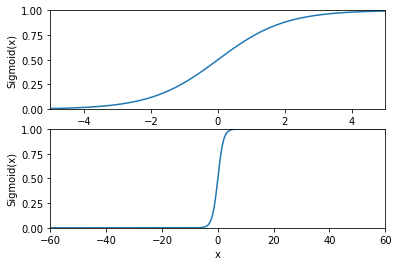

In [1]:
#梯度上升法
%matplotlib inline 
%run EXTRAS/sigmoidPlot.py

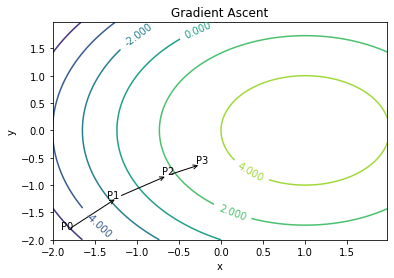

In [2]:
%run EXTRAS/plotGD.py

## 训练算法：使用梯度上升找到最佳参数

**梯度上升伪代码**

```
每个回归系数初始化为1
重复R次：
    计算整个数据集的梯度
    使用alpha×gradient更新回归系数的向量
    返回回归系数
```

In [3]:
from numpy import *
def loadDataSet():
    dataMat, labelMat = [], []
    with open('testSet.txt') as fr:
        for line in fr.readlines():
            lineArr = line.strip().split()
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose()*error
    return weights

In [4]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## 分析数据：画出决策边界

In [5]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

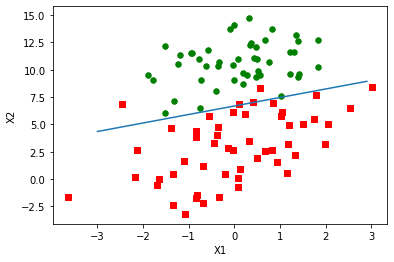

In [6]:
plotBestFit(weights.getA())

## 训练算法：随机梯度上升

**伪代码**
```
所有回归系数初始化为1
对数据集中的每个样本
    计算该样本的梯度
    使用alpha×gradient更新回归系数值
返回回归系数值
```

In [7]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha*error*dataMatrix[i]
    return weights

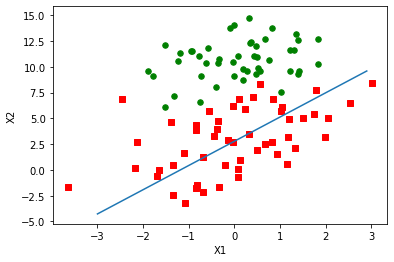

In [8]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat)
plotBestFit(weights)

[14.31407352  0.94851429 -2.09063024]


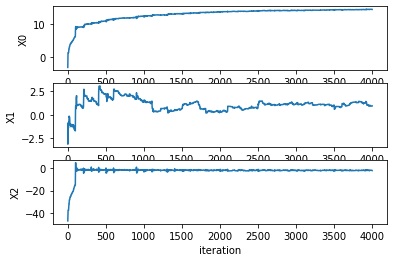

<Figure size 432x288 with 0 Axes>

In [9]:
%run EXTRAS/plotSDerror.py

In [13]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01 #alpha每次迭代以后减小
            randIndex = int(random.uniform(0, len(dataIndex))) #随机选取更新
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error *dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

[14.39709725  1.20589599 -2.22272577]


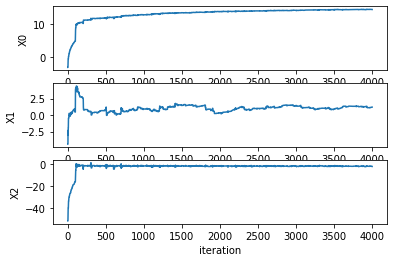

In [11]:
%run EXTRAS/plotSDerror.py

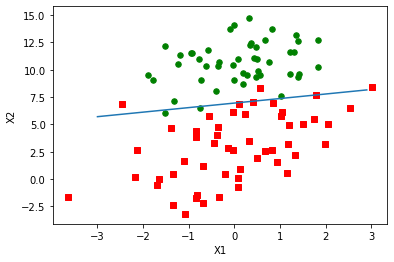

In [14]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr), labelMat)
plotBestFit(weights)

## 示例：从疝气病症预测病马的死亡率

1. 收集数据：
2. 准备数据：解析文本文件，并填充缺失值
3. 分析数据：可视化并观察数据
4. 训练算法：使用优化算法，找到最佳的系数
5. 测试算法：观察错误率，根据错误率决定是否重新训练，通过改变迭代次数和步长等超参来得到更好的回归系数。
6. 使用算法

## 准备数据：处理数据中的缺失值
**几种常用做法**
 - 使用可用特征的均值来填补缺失值
 - 使用特殊值来填补缺失值
 - 忽略有缺失值的样本
 - 使用相似样本的均值填补缺失值
 - 使用另外的机器学习算法预测缺失值

## 测试算法：用Logistic回归进行分类

In [15]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob>0.5:return 1.0
    else:return 0.0

def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet, trainingLabels = [], []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21): #21个特征，1个标签
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount, numTestVec = 0, 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21): #21个特征，1个标签
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount/numTestVec))
    print("测试集错误率：%f" % errorRate)
    return errorRate
def multiTest():
    numTests, errorSum = 10, 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("经过%d次迭代，平均错误率为：%f" % (numTests, errorSum/float(numTests)))

In [16]:
multiTest()

测试集错误率：0.283582
测试集错误率：0.462687
测试集错误率：0.298507
测试集错误率：0.313433
测试集错误率：0.388060
测试集错误率：0.507463
测试集错误率：0.358209
测试集错误率：0.373134
测试集错误率：0.328358
测试集错误率：0.343284
经过10次迭代，平均错误率为：0.365672
